In [ ]:
# Regression Problem - K-Fold - Enhanced

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import datetime
from datetime import datetime

In [2]:
# Get current date in YYYY-MM-DD format
current_date = datetime.now().strftime('%Y-%m-%d')

In [3]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
#df_train.isnull().sum()
# Display only the column names where there are missing values
df_train_columns_with_missing_values = df_train.columns[df_train.isnull().sum() > 0]
print(df_train_columns_with_missing_values)

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


In [8]:
# Identify categorical columns
categorical_columns = df_train.select_dtypes(include=['object']).columns
print("Categorical columns:", list(categorical_columns))

Categorical columns: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [9]:
# Identify numerical columns
numerical_columns = df_train.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical columns:", list(numerical_columns))


Numerical columns: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [10]:
# Print value counts for each categorical column
print("\nValue counts for each categorical column:")
print("==========================================")
for categorical_column in categorical_columns:
    print(f"\nColumn: {categorical_column}")
    print(df_train[categorical_column].value_counts())
    print("Null values:", df_train[categorical_column].isnull().sum())
    print("------------------------------------------------------")


Value counts for each categorical column:

Column: MSZoning
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
Null values: 0
------------------------------------------------------

Column: Street
Street
Pave    1454
Grvl       6
Name: count, dtype: int64
Null values: 0
------------------------------------------------------

Column: Alley
Alley
Grvl    50
Pave    41
Name: count, dtype: int64
Null values: 1369
------------------------------------------------------

Column: LotShape
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64
Null values: 0
------------------------------------------------------

Column: LandContour
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64
Null values: 0
------------------------------------------------------

Column: Utilities
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64
Null values: 0
-----------------------

In [11]:
#Initialize transformers
# cat_imputer = SimpleImputer(strategy='most_frequent')
# num_imputer = SimpleImputer(strategy='median')
# encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# scaler = StandardScaler()

# Initialize transformers
cat_imputer = SimpleImputer(strategy='constant', fill_value='None')
num_imputer = SimpleImputer(strategy='median')
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
scaler = StandardScaler()

In [12]:
def get_categorical_numerical_columns(df):
    """Identify categorical and numerical columns with improved column selection"""
    categorical_columns = df.select_dtypes(include=['object']).columns
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

    # Exclude ID and target variables
    numerical_columns = numerical_columns.drop(['Id', 'SalePrice'] if 'SalePrice' in numerical_columns else ['Id'])

    # Identify ordinal columns (could be treated differently)
    ordinal_columns = [
        'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond',
        'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual',
        'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC'
    ]

    return list(categorical_columns), list(numerical_columns), ordinal_columns


In [13]:
def process_numerical(df, is_training=True):
    """Enhanced numerical processing with safety checks"""
    global num_imputer, scaler
    _, numerical_columns, _ = get_categorical_numerical_columns(df)

    # Handle specific columns differently
    df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(
        lambda x: x.fillna(x.median())
    )

    # Replace infinite values with NaN
    df = df.replace([np.inf, -np.inf], np.nan)

    if is_training:
        # Handle outliers for specific columns
        outlier_columns = ['GrLivArea', 'TotalBsmtSF', 'LotArea']
        for col in outlier_columns:
            if col in df.columns:
                Q1 = df[col].quantile(0.25)
                Q3 = df[col].quantile(0.75)
                IQR = Q3 - Q1
                df[col] = df[col].clip(Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)

        num_imputer = SimpleImputer(strategy='median')
        df[numerical_columns] = num_imputer.fit_transform(df[numerical_columns])
    else:
        df[numerical_columns] = num_imputer.transform(df[numerical_columns])

    return df

In [14]:
def create_interaction_features(df):
    """Create interaction features with safety checks"""
    df = df.copy()

    # Add small epsilon to prevent division by zero
    epsilon = 1e-8

    # Quality-related interactions
    df['Quality_Space'] = df['OverallQual'] * df['GrLivArea']
    df['Quality_Age'] = df['OverallQual'] * df['Age']
    df['Quality_Garage'] = df['OverallQual'] * df['GarageCars']

    # Area-related interactions (with safety checks)
    df['Living_Lot_Ratio'] = (df['GrLivArea'] / (df['LotArea'] + epsilon)).clip(0, 1e6)
    df['Total_Bath_Bed_Ratio'] = (df['TotalBaths'] / (df['BedroomAbvGr'] + epsilon)).clip(0, 1e2)

    # Age-related interactions (with safety checks)
    df['Age_Quality'] = df['Age'] * df['OverallQual']
    df['Remod_Age_Ratio'] = (df['RemodAge'] / (df['Age'] + epsilon)).clip(-1e6, 1e6)

    return df

In [15]:
def feature_engineering(df):
    """Enhanced feature engineering with safety checks"""
    df = df.copy()

    # Basic features
    df['Age'] = df['YrSold'] - df['YearBuilt']
    df['RemodAge'] = df['YrSold'] - df['YearRemodAdd']
    df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
    df['TotalBaths'] = df['FullBath'] + (0.5 * df['HalfBath']) + \
                       df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath'])
    df['TotalPorchSF'] = df['OpenPorchSF'] + df['EnclosedPorch'] + \
                         df['3SsnPorch'] + df['ScreenPorch']

    # New features
    df['TotalQual'] = df['OverallQual'] + df['OverallCond']
    # Add epsilon to prevent division by zero
    df['AvgRoomSize'] = (df['GrLivArea'] / (df['TotRmsAbvGrd'] + 1e-8)).clip(0, 1e6)
    df['HasHighQuality'] = (df['OverallQual'] >= 8).astype(int)
    df['IsNew'] = (df['YearBuilt'] == df['YrSold']).astype(int)
    df['HasRemodeled'] = (df['YearRemodAdd'] != df['YearBuilt']).astype(int)

    # Binary features
    df['HasPool'] = (df['PoolArea'] > 0).astype(int)
    df['HasGarage'] = (df['GarageArea'] > 0).astype(int)
    df['HasFireplace'] = (df['Fireplaces'] > 0).astype(int)
    df['HasBasement'] = (df['TotalBsmtSF'] > 0).astype(int)

    # Create interaction features
    df = create_interaction_features(df)

    # Replace infinite values with NaN
    df = df.replace([np.inf, -np.inf], np.nan)

    return df

In [16]:
# First, let's modify the process_categorical function to ensure all categorical variables are encoded
def process_categorical(df, is_training=True):
    """Enhanced categorical processing with complete encoding"""
    global cat_imputer, encoder
    categorical_columns, _, _ = get_categorical_numerical_columns(df)

    # Get all object columns that remain in the dataframe
    remaining_cat_cols = df.select_dtypes(include=['object']).columns

    if is_training:
        cat_imputer = SimpleImputer(strategy='constant', fill_value='None')
        df[remaining_cat_cols] = cat_imputer.fit_transform(df[remaining_cat_cols])

        encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
        encoded_features = encoder.fit_transform(df[remaining_cat_cols])
    else:
        df[remaining_cat_cols] = cat_imputer.transform(df[remaining_cat_cols])
        encoded_features = encoder.transform(df[remaining_cat_cols])

    encoded_feature_names = encoder.get_feature_names_out(remaining_cat_cols)
    encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names, index=df.index)

    # Drop original categorical columns and add encoded ones
    df = df.drop(columns=remaining_cat_cols)
    df = pd.concat([df, encoded_df], axis=1)

    return df

In [17]:
def prepare_data(df, is_training=True):
    """Main function with improved pipeline"""
    df = df.copy()

    # Feature engineering first
    df = feature_engineering(df)

    # Process numerical data
    df = process_numerical(df, is_training)

    # Process categorical data
    df = process_categorical(df, is_training)

    # Scale numerical features
    _, numerical_columns, _ = get_categorical_numerical_columns(df)
    if is_training:
        df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
    else:
        df[numerical_columns] = scaler.transform(df[numerical_columns])

    # Drop unnecessary columns
    columns_to_drop = ['Id'] + ['MiscFeature', 'Fence', 'PoolQC', 'Alley']
    if not is_training and 'SalePrice' in df.columns:
        columns_to_drop.append('SalePrice')

    df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

    return df

In [18]:
# Now let's create a function to analyze correlations
def analyze_correlations(df_train_processed, target='SalePrice'):
    """Analyze and visualize correlations"""
    # Get numerical columns only
    numerical_cols = df_train_processed.select_dtypes(include=['float64', 'int64']).columns

    # Calculate correlations for numerical columns only
    correlation_matrix = df_train_processed[numerical_cols].corr()

    # Print correlations with target
    if target in numerical_cols:
        print("\nTop 10 Correlations with {}:".format(target))
        print(correlation_matrix[target].sort_values(ascending=False)[:10])

    # Create correlation heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix Heatmap')
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    return correlation_matrix


In [19]:
df_train_processed = prepare_data(df_train.copy(), is_training=True)
df_test_processed = prepare_data(df_test.copy(), is_training=False)

# Log transform the target variable
df_train_processed['SalePrice'] = np.log1p(df_train['SalePrice'])

In [20]:
df_train_processed.isnull().sum()

MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 325, dtype: int64

In [21]:
df_train_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 325 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(318), int32(7)
memory usage: 3.6 MB


In [22]:
df_test_processed.isnull().sum()

MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 324, dtype: int64

In [23]:
df_test_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 324 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(317), int32(7)
memory usage: 3.6 MB



Top 10 Correlations with SalePrice:
SalePrice         1.000000
OverallQual       0.817185
Quality_Garage    0.815116
Quality_Space     0.800062
TotalSF           0.777297
GrLivArea         0.722437
GarageCars        0.680625
TotalBaths        0.673011
GarageArea        0.650888
TotalBsmtSF       0.644791
Name: SalePrice, dtype: float64


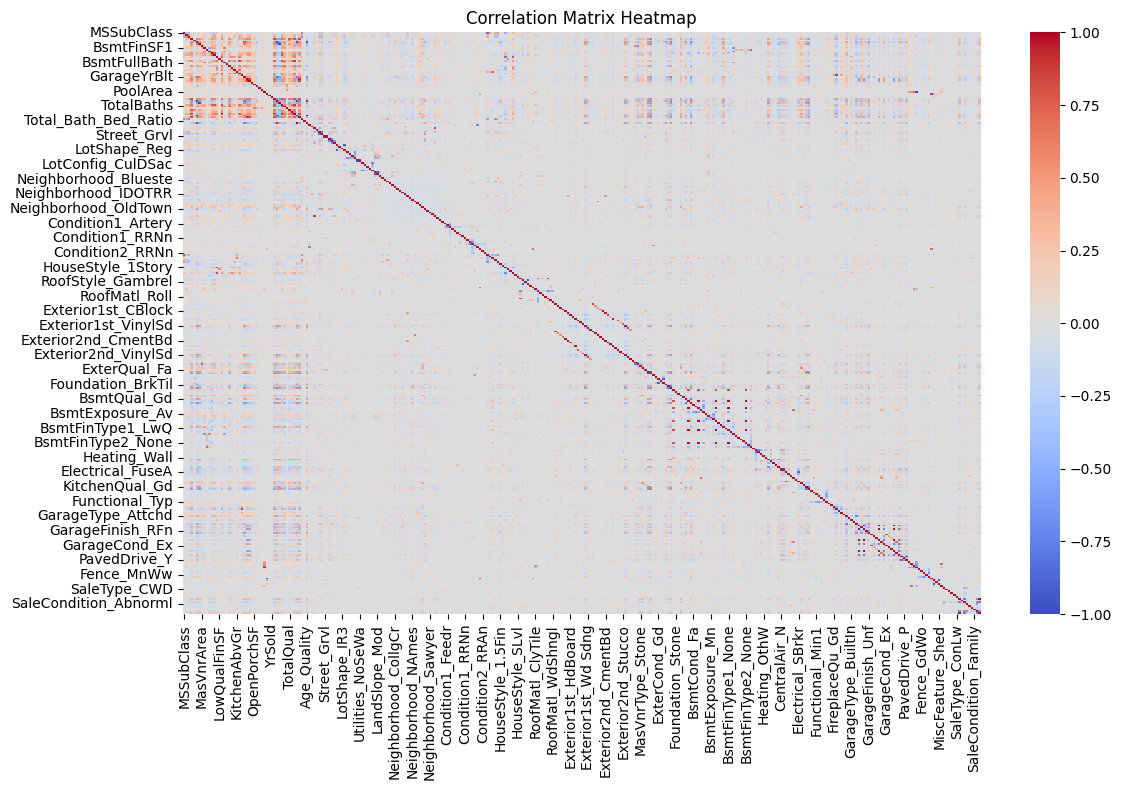

In [24]:
# Analyze correlations
correlation_matrix = analyze_correlations(df_train_processed)

#correlation_matrix_train = df_train_processed.corr()
#print(correlation_matrix_train)

In [25]:
# Prepare training data
X = df_train_processed.drop('SalePrice', axis=1)
y = df_train_processed['SalePrice']

In [26]:
# Save test IDs
test_ids = df_test['Id']
X_test = df_test_processed

# Split the data
X_train, X_val, y_train, y_val = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42
)

# Print shapes
print("\nData Shapes:")
print("Training features shape:", X_train.shape)
print("Validation features shape:", X_val.shape)
print("Test features shape:", X_test.shape)


Data Shapes:
Training features shape: (1168, 324)
Validation features shape: (292, 324)
Test features shape: (1459, 324)


In [27]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # Ensure balanced split for binary classification
)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

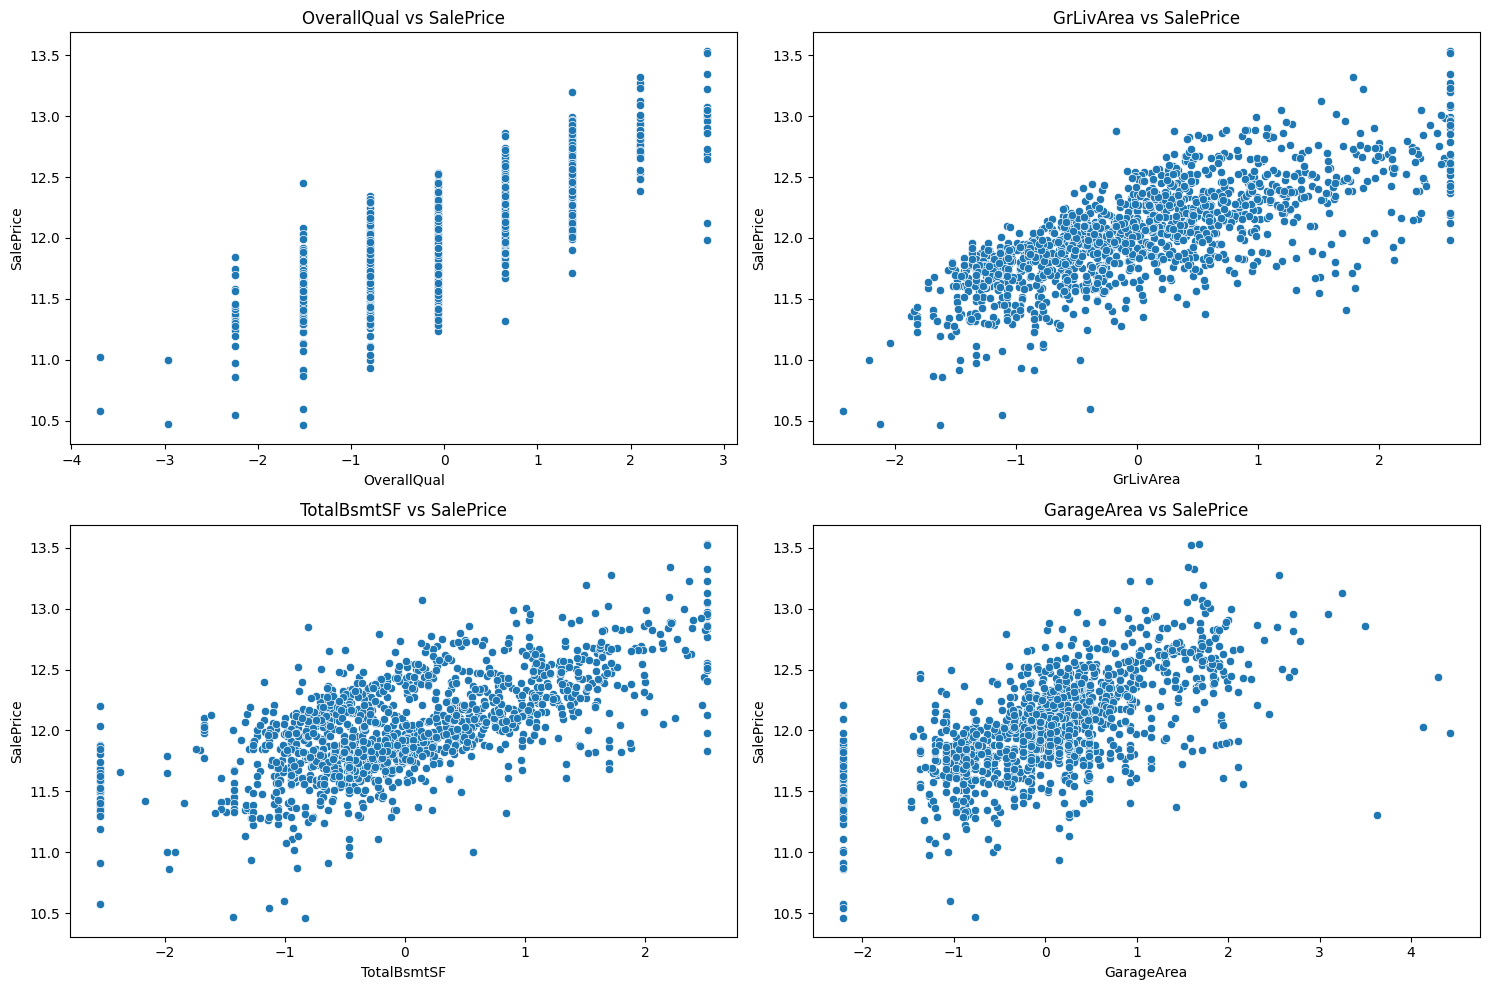

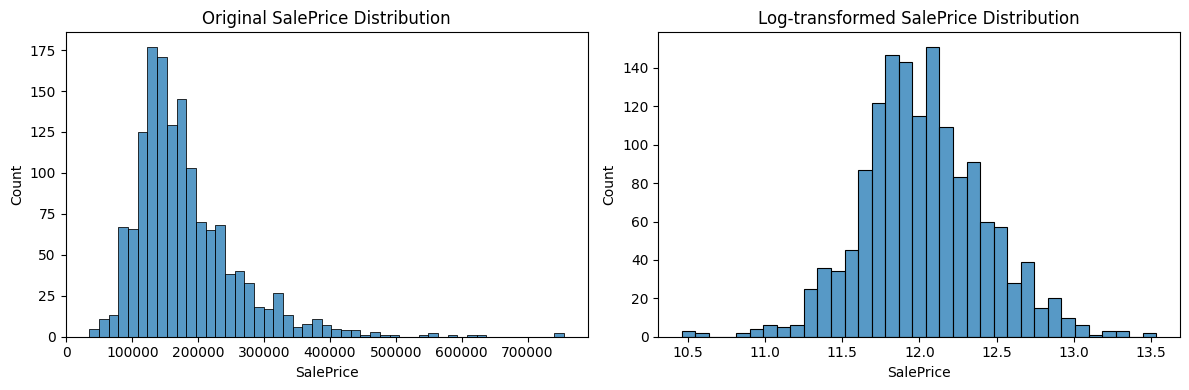

In [28]:
# Visualize important features
def plot_important_features(df, target='SalePrice'):
    """Plot important feature relationships"""
    important_numerical = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageArea']

    # Scatter plots
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.ravel()

    for idx, feature in enumerate(important_numerical):
        sns.scatterplot(data=df, x=feature, y=target, ax=axes[idx])
        axes[idx].set_title(f'{feature} vs {target}')

    plt.tight_layout()
    plt.show()

    # Distribution of target
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(df_train['SalePrice'], ax=ax1)
    ax1.set_title('Original SalePrice Distribution')

    sns.histplot(df_train_processed['SalePrice'], ax=ax2)
    ax2.set_title('Log-transformed SalePrice Distribution')

    plt.tight_layout()
    plt.show()

# Plot important features
plot_important_features(df_train_processed)


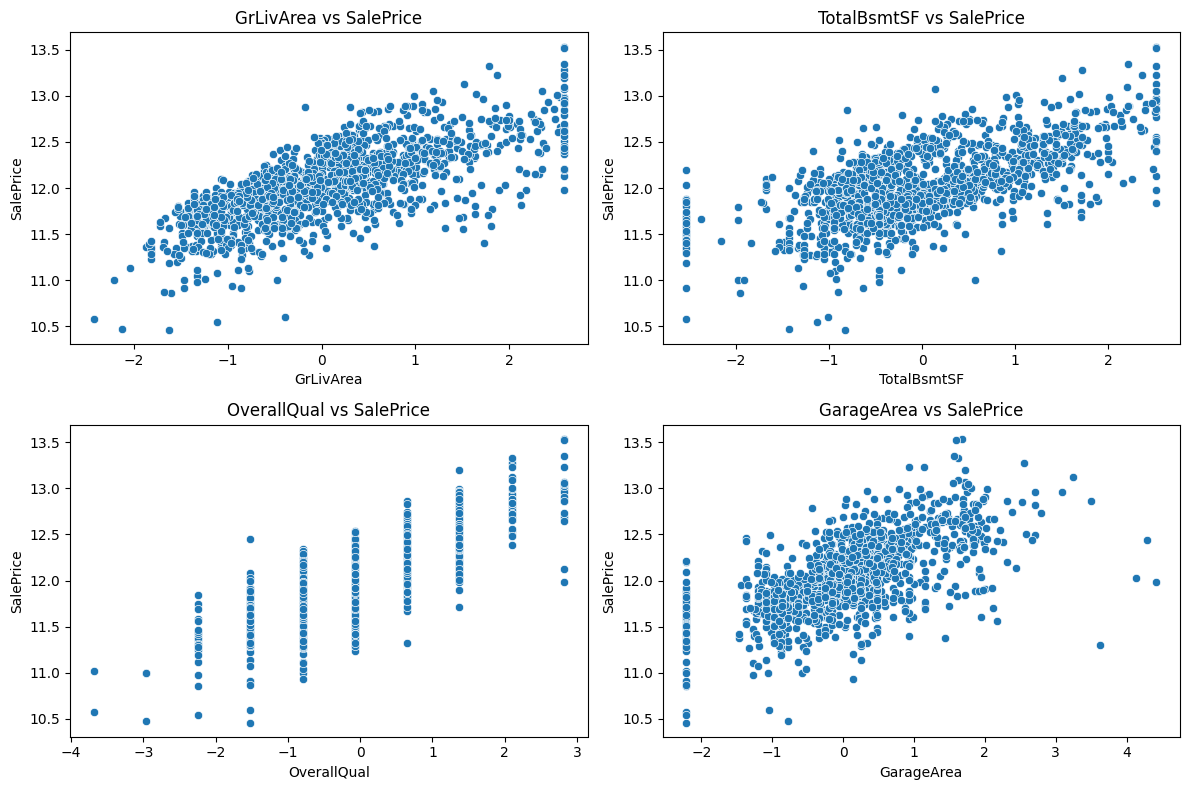

In [29]:
# Scatter plots of important numerical features vs SalePrice
def plot_scatter_with_price(df, features, target='SalePrice'):
    n = len(features)
    fig, axes = plt.subplots(n//2, 2, figsize=(12, 4*n//2))
    axes = axes.ravel()

    for idx, feature in enumerate(features):
        sns.scatterplot(data=df, x=feature, y=target, ax=axes[idx])
        axes[idx].set_title(f'{feature} vs {target}')

    plt.tight_layout()
    plt.show()

important_features = ['GrLivArea', 'TotalBsmtSF', 'OverallQual', 'GarageArea']
plot_scatter_with_price(df_train_processed, important_features)

In [30]:
# Detect and print outliers
def analyze_outliers(df, features, target='SalePrice', n_std=3):
    """Analyze outliers in important features"""
    for feature in features:
        mean = df[feature].mean()
        std = df[feature].std()
        outliers = df[(df[feature] < mean - n_std * std) | 
                     (df[feature] > mean + n_std * std)]

        if len(outliers) > 0:
            print(f"\nOutliers in {feature}:")
            print(outliers[[feature, target]].head())

# Analyze outliers
important_features = ['GrLivArea', 'TotalBsmtSF', 'OverallQual', 'GarageArea']
analyze_outliers(df_train_processed, important_features)


Outliers in OverallQual:
     OverallQual  SalePrice
375    -3.688413  11.018646
533    -3.688413  10.579005

Outliers in GarageArea:
      GarageArea  SalePrice
178     3.242477  13.126033
581     4.290521  12.442306
664     3.092757  12.955130
825     3.495131  12.861001
1061    3.626136  11.302217


In [31]:
### Train

In [32]:
# Cell 10: Train XGBoost model
import xgboost as xgb

In [61]:
# Updated hyperparameters
hyperparameters = {
    'n_estimators': 2000,
    'max_depth': 4,            # Increased slightly
    'learning_rate': 0.005,    # Adjusted
    'subsample': 0.7,          # Increased
    'colsample_bytree': 0.7,   # Increased
    'min_child_weight': 5,     # Adjusted
    'gamma': 0.2,              # Adjusted
    'reg_alpha': 0.3,          # Adjusted
    'reg_lambda': 1.5,         # Adjusted
    'random_state': 42,
    'tree_method': 'hist',
    'eval_metric': 'rmse',
    'early_stopping_rounds': 100,
    'verbosity': 1,
    'objective': 'reg:squarederror'
}

In [59]:
# 2. Enhanced cross-validation with feature selection
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold

# Define core features based on importance and consistency
CORE_FEATURES = [
    'OverallQual', 
    'TotalSF', 
    'GarageCars',
    'GrLivArea',
    'TotalBaths',
    'BsmtQual_Ex',
    'KitchenQual_TA',
    'CentralAir_N',
    'MSZoning_RM',
    'TotalQual'
]

def create_enhanced_features(df):
    """Create enhanced feature set with focused interactions"""
    df = df.copy()

    # Quality interactions
    df['Quality_Space'] = df['OverallQual'] * df['TotalSF']
    df['Quality_Garage'] = df['OverallQual'] * df['GarageCars']
    df['Quality_Bath'] = df['OverallQual'] * df['TotalBaths']

    # Area ratios
    df['GarageRatio'] = df['GarageArea'] / (df['TotalSF'] + 1)
    df['LivingAreaRatio'] = df['GrLivArea'] / (df['TotalSF'] + 1)

    # Quality combinations
    df['TotalQuality'] = df['OverallQual'] + df['TotalQual']
    df['QualityScore'] = df['OverallQual'] * df['TotalQual']

    return df

def enhanced_cv_model_v2(X, y, hyperparameters, n_folds=5):
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
    models = []
    scores_train = []
    scores_val = []

    # Create enhanced features
    X = create_enhanced_features(X)

    for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
        print(f"\nFold {fold + 1}:")
        X_train_fold = X.iloc[train_idx]
        y_train_fold = y.iloc[train_idx]
        X_val_fold = X.iloc[val_idx]
        y_val_fold = y.iloc[val_idx]

        # Train model
        model = xgb.XGBRegressor(**hyperparameters)
        model.fit(
            X_train_fold, 
            y_train_fold,
            eval_set=[(X_train_fold, y_train_fold), 
                     (X_val_fold, y_val_fold)],
            verbose=False
        )

        # Get predictions
        train_pred = model.predict(X_train_fold)
        val_pred = model.predict(X_val_fold)

        # Calculate scores
        train_rmse = np.sqrt(mean_squared_error(y_train_fold, train_pred))
        val_rmse = np.sqrt(mean_squared_error(y_val_fold, val_pred))

        scores_train.append(train_rmse)
        scores_val.append(val_rmse)
        models.append(model)

        print(f"Train RMSE: {train_rmse:.4f}")
        print(f"Val RMSE: {val_rmse:.4f}")

        # Print feature importance for this fold
        importance = pd.DataFrame({
            'feature': X_train_fold.columns,
            'importance': model.feature_importances_
        }).sort_values('importance', ascending=False)

        print("\nTop 10 features for this fold:")
        print(importance.head(10))

    print("\nOverall Performance:")
    print(f"Average Train RMSE: {np.mean(scores_train):.4f} (+/- {np.std(scores_train):.4f})")
    print(f"Average Val RMSE: {np.mean(scores_val):.4f} (+/- {np.std(scores_val):.4f})")

    return models, scores_train, scores_val

In [60]:
# 3. Updated ensemble prediction function
def enhanced_ensemble_predict(models, X):
    X = create_enhanced_features(X)  # Create enhanced features for test set
    predictions = np.column_stack([
        model.predict(X) for model in models
    ])
    return np.mean(predictions, axis=1)

In [62]:
# Train with new approach
models, train_scores, val_scores = enhanced_cv_model_v2(X, y, hyperparameters)



Fold 1:
Train RMSE: 0.1050
Val RMSE: 0.1402

Top 10 features for this fold:
            feature  importance
3       OverallQual    0.260218
43   HasHighQuality    0.065111
327    TotalQuality    0.055408
38          TotalSF    0.050111
50    Quality_Space    0.035095
324    Quality_Bath    0.017478
191    ExterQual_Gd    0.015560
52   Quality_Garage    0.012272
39       TotalBaths    0.011942
244    CentralAir_N    0.010878

Fold 2:
Train RMSE: 0.1052
Val RMSE: 0.1228

Top 10 features for this fold:
              feature  importance
3         OverallQual    0.282765
38            TotalSF    0.057328
327      TotalQuality    0.053547
50      Quality_Space    0.035980
192      ExterQual_TA    0.018439
43     HasHighQuality    0.017658
52     Quality_Garage    0.016439
324      Quality_Bath    0.016327
191      ExterQual_Gd    0.014859
266  FireplaceQu_None    0.012595

Fold 3:
Train RMSE: 0.1061
Val RMSE: 0.1590

Top 10 features for this fold:
            feature  importance
3       Ove

In [54]:
# Make predictions
test_predictions = enhanced_ensemble_predict(models, X_test)
test_predictions_original = np.expm1(test_predictions)

In [55]:
# Create submission
submission = pd.DataFrame({
    'Id': test_ids,
    'SalePrice': test_predictions_original
})


In [56]:
# Save submission with feature count info
mean_cv_score = np.mean(val_scores)
avg_feature_count = np.mean([len(feat) for feat in selected_features])
submission.to_csv(
    f'data-out/prediction_features_v4_{int(avg_feature_count)}_cv{mean_cv_score:.4f}_{current_date}.csv', 
    index=False
)

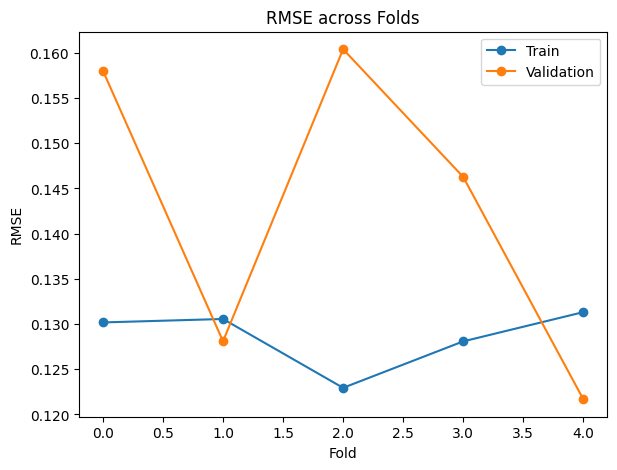

In [57]:
# Visualize feature importance consistency
plt.figure(figsize=(15, 5))

# Plot 1: RMSE across folds
plt.subplot(1, 2, 1)
plt.plot(range(len(train_scores)), train_scores, label='Train', marker='o')
plt.plot(range(len(val_scores)), val_scores, label='Validation', marker='o')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.title('RMSE across Folds')
plt.legend()
